# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the TMDB Movie dataset for analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

#### Importing all the necessary packages which will help to perform analysis on the data

In [1]:
# Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

### The Questions that I am planning to explore over the course of the report are as follows

#### Q1: Which genres had the highest popularity from year to year?
#### Q2: What features are associated with better revenue?
#### Q3: Which movie earned the highest revenue in each year and who directed the movie?
#### Q4: Which movie earned the maximum profit in each year and which genres does the movie belong to?
#### Q5: What is the average runtime for the films in each year?

<a id='wrangling'></a>
## Data Wrangling

In this section, I will gather the data, inspect the data and perform cleaning operations on the data to make the data ready for my analysis.


#### Load the data and print few lines

In [2]:
# Load data

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Check the dimensions of the dataframe

In [3]:
# check Dimensions

df.shape

(10866, 21)

The dataframe consists of 10,866 observations and 21 features

#### Check for the information about number of non-null values in each column and which columns contain null values

In [4]:
# Get Information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Out of 21 columns present in the dataframe 9 columns contains null values

### Data Cleaning 

#### Drop Extraneous Columns

In [5]:
# Drop columns

df.drop(['id','imdb_id','cast','homepage','tagline','keywords','overview','production_companies','vote_count','vote_average','release_date','budget_adj','revenue_adj'], axis = 1, inplace = True)

columns were dropped which were not need for the analysis. This makes the data look clean and tidy

#### Print few lines and check the dataframe

In [6]:
# Print few lines

df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015


The trimmed dataframed consists of 8 columns 

#### Check for the information about number of non-null values in each column and which columns contain null values

In [7]:
# Get Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 679.2+ KB


2 out of 8 columns contains null values and we can handle null values in two ways. One way is to fill the null values and the other way is to drop the null values. In this situation dropping the null values will be a better approach since both columns contains categorical data.

#### Drop null values and Check for null values

In [8]:
#Drop and check null values

df.dropna(inplace=True)
assert pd.notnull(df).any().any()

The null values in both the columns were dropped

#### Check for duplicate rows

In [9]:
# Check for duplicates

df.duplicated().sum()

1

It looks like 1 duplicate row is present in the dataframe

#### Drop duplicate rows and check for duplicate rows

In [10]:
# Drop duplicates

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Duplicate rows were removed from the dataframe

#### Check the datatypes of the columns

In [11]:
# Check datatypes

df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_year        int64
dtype: object

The datatypes for all the columns are as expected so no need for any datatype conversions

<a id='eda'></a>
## Exploratory Data Analysis

Now that I have trimmed, cleaned and made the data ready for the analysis, I am ready to move on to exploration. In this section, I will Compute statistics, perform analysis and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. 

#### Find summary statistics of the dataframe

In [12]:
# Find summary statistics

df.describe()

,popularity,budget,revenue,runtime,release_year
count,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000
mean,0.649455,1.471114e+07,4.006558e+07,102.189722,2001.289537
std,1.002441,3.098677e+07,1.173193e+08,30.783873,12.819545
min,0.000188,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.209157,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.385471,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,0.717508,1.564374e+07,2.455409e+07,111.250000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


Summary statistics for all the numerical columns in the dataframe was shown above

#### Address research questions and perform data analysis

### Q1: Which genres had the highest popularity from year to year?

In [13]:
# Highest Popularity

def find_genre(group):
    max_pop = group['popularity'].max()
    genre = group[max_pop == group['popularity']]['genres']
    genre = genre.values
    return pd.DataFrame({'genre' : genre, 'popularity': max_pop})

gen_pop = df.groupby('release_year')[['genres','popularity']].apply(find_genre)
gen_pop = gen_pop.reset_index(level=[0,1])
gen_pop.index = gen_pop['release_year']
gen_pop.drop(['release_year','level_1'], axis=1,inplace=True)
gen_pop

,genre,popularity
release_year,,
1960,Drama|Horror|Thriller,2.610362
1961,Adventure|Animation|Comedy|Family,2.631987
1962,Adventure|Action|Thriller,3.170651
1963,Action|Thriller|Adventure,2.508235
1964,Adventure|Action|Thriller,3.153791
1965,Adventure|Action|Thriller,1.910465
1966,Animation|Family|Comedy,1.227582
1967,Family|Animation|Adventure,2.550704
1968,Science Fiction|Mystery|Adventure,3.309196


#### Line chart to visualize the findings from the question 1

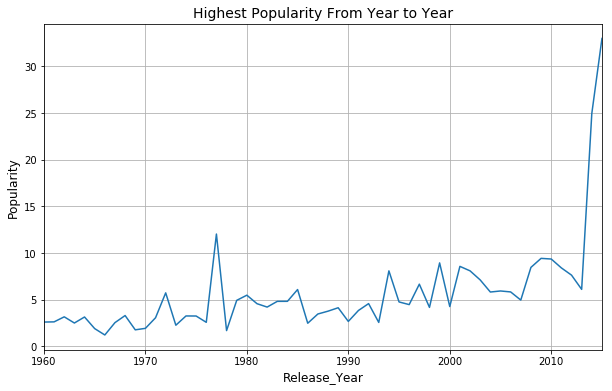

In [14]:
#Line Chart

gen_pop['popularity'].plot(figsize=(10,6), grid=True)
plt.title('Highest Popularity From Year to Year', fontsize=14)
plt.xlabel('Release_Year', fontsize = 12)
plt.ylabel('Popularity', fontsize=12)
plt.show();

It appears that popularity for the genres has been increasing over the years

#### Histogram to visualize the findinds of question 1

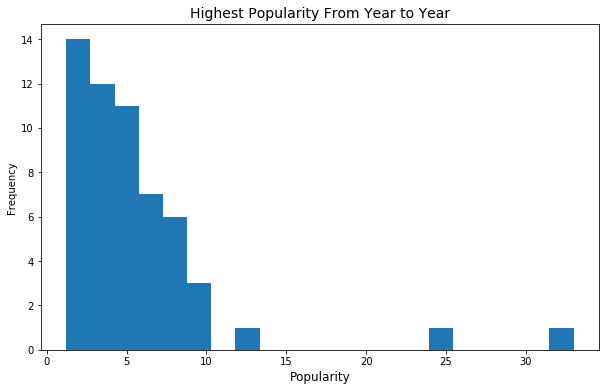

In [15]:
# Histogram

gen_pop['popularity'].plot(kind='hist', bins = 21, figsize=(10,6))
plt.title('Highest Popularity From Year to Year', fontsize=14)
plt.xlabel('Popularity', fontsize=12)
plt.show();

It seems like most of the popularity for the genres is below 10

### Q2: What features are associated with better revenue?

In [16]:
# Features associated

df.query('revenue > revenue.mean()').describe()

,popularity,budget,revenue,runtime,release_year
count,2165.000000,2.165000e+03,2.165000e+03,2165.000000,2165.000000
mean,1.626249,5.209760e+07,1.840993e+08,112.669284,2001.895150
std,1.785485,4.861774e+07,2.059524e+08,23.961915,10.668878
min,0.010335,0.000000e+00,4.008404e+07,44.000000,1960.000000
25%,0.737768,1.800000e+07,6.678791e+07,98.000000,1996.000000
50%,1.162695,3.900000e+07,1.132443e+08,109.000000,2004.000000
75%,1.889388,7.000000e+07,2.140151e+08,123.000000,2010.000000
max,32.985763,3.800000e+08,2.781506e+09,705.000000,2015.000000


Features associated with better revenue were popularity, budget, revenue, runtime and release year

### Q3: Which movie earned the highest revenue in each year and who directed the movie?

In [17]:
# Highest Revenue

def find_max(group):
    max_rev = group['revenue'].max()
    org_title = group[max_rev == group['revenue']]['original_title']
    org_title = org_title.values
    director = group[max_rev == group['revenue']]['director']
    director = director.values
    return pd.DataFrame({'movie_title':org_title,'director': director,'revenue':max_rev})
    
title = df.groupby('release_year')[['original_title','director','revenue']].apply(find_max)
title = title.reset_index(level=[0,1])
del title['level_1']
title.index = title['release_year']
del title['release_year']
title

,director,movie_title,revenue
release_year,,,
1960,Stanley Kubrick,Spartacus,60000000
1961,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,One Hundred and One Dalmatians,215880014
1962,David Lean,Lawrence of Arabia,70000000
1963,Terence Young,From Russia With Love,78898765
1964,Guy Hamilton,Goldfinger,124900000
1965,Robert Wise,The Sound of Music,163214286
1966,Mike Nichols,Who's Afraid of Virginia Woolf?,33736689
1967,Wolfgang Reitherman,The Jungle Book,205843612
1968,Stanley Kubrick,2001: A Space Odyssey,56715371


#### Line chart to visualize the findings in question 3

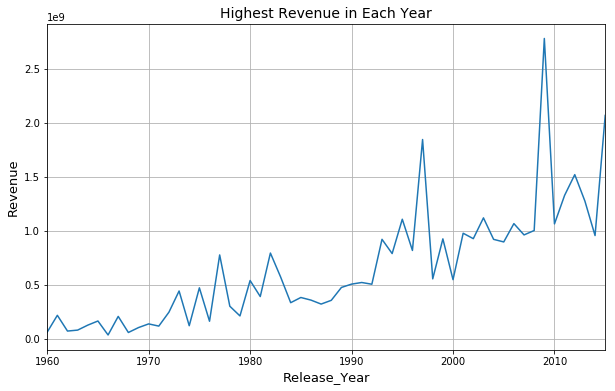

In [18]:
# Line chart

title['revenue'].plot(figsize=(10,6), grid=True)
plt.title('Highest Revenue in Each Year',fontsize=14)
plt.xlabel('Release_Year', fontsize = 13)
plt.ylabel('Revenue', fontsize=13)
plt.show();

From the line chart it looks like maximum revenue obtained in each year is increasing over the years.

#### Histogram to visualize the findings in question 3

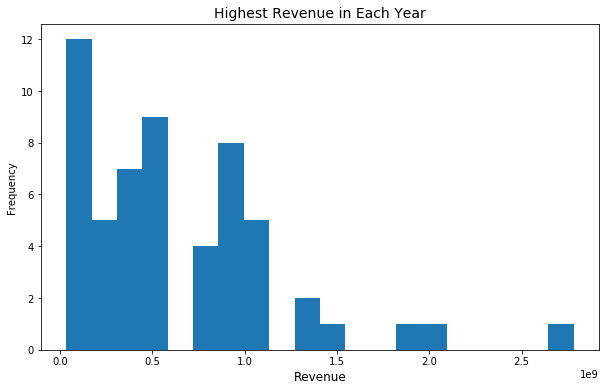

In [19]:
# Histogram

title['revenue'].plot(kind='hist', bins = 20, figsize=(10,6))
plt.title('Highest Revenue in Each Year', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.show();

From histogram it appears that movies released in most of the years have highest revenue below 1 Billion dollars

### Q4: Which movie earned the maximum profit in each year and which genres does the movie belong to?

In [20]:
# Maximum Profit

def find_profit(group):
    profit = group['revenue'] - group['budget']
    group['profit'] = profit
    high_profit = group['profit'].max()
    movie = group[group['profit'] == high_profit]['original_title']
    movie = movie.values
    genre = group[group['profit'] == high_profit]['genres']
    genre = genre.values
    return pd.DataFrame({'profit' : high_profit, 'movie_title' : movie, 'genres': genre})
    
profit = df.groupby('release_year')[['budget','revenue','original_title','genres']].apply(find_profit)
profit = profit.reset_index(level = [0,1])
profit.index = profit['release_year']
del profit['release_year']
del profit['level_1']
profit

,genres,movie_title,profit
release_year,,,
1960,Action|Drama|History,Spartacus,48000000
1961,Adventure|Animation|Comedy|Family,One Hundred and One Dalmatians,211880014
1962,Adventure|Action|Thriller,Dr. No,58500000
1963,Action|Thriller|Adventure,From Russia With Love,76398765
1964,Adventure|Action|Thriller,Goldfinger,121400000
1965,Drama|Family|Music|Romance,The Sound of Music,155014286
1966,Drama,Who's Afraid of Virginia Woolf?,26236689
1967,Family|Animation|Adventure,The Jungle Book,201843612
1968,Science Fiction|Mystery|Adventure,2001: A Space Odyssey,44715371


#### Line chart to visualize the findings in question 4

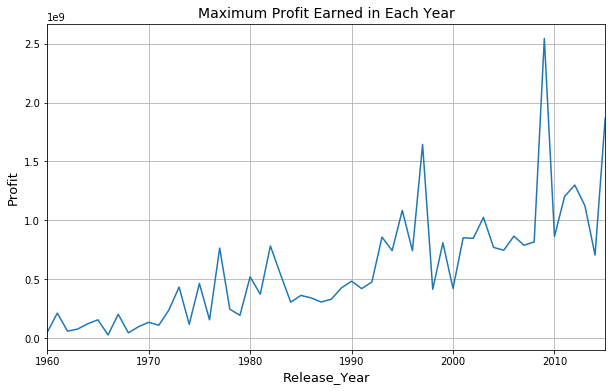

In [21]:
# Maximum Profit

profit['profit'].plot(figsize=(10,6), grid=True)
plt.title('Maximum Profit Earned in Each Year',fontsize=14)
plt.xlabel('Release_Year', fontsize = 13)
plt.ylabel('Profit', fontsize=13)
plt.show();

From line chart it seems like the profit earned by the movies has been increasing over the years

#### Histogram to visualize the findings in question 4

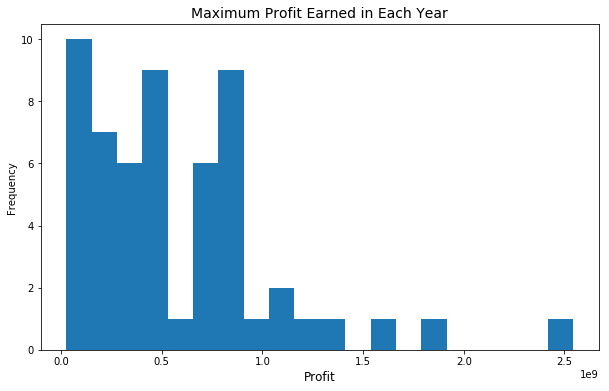

In [22]:
# Histogram

profit['profit'].plot(kind='hist', bins = 20, figsize=(10,6))
plt.title('Maximum Profit Earned in Each Year', fontsize=14)
plt.xlabel('Profit', fontsize=12)
plt.show();

From histogram it looks like movies released in most of the years earned profit below 1 Billion dollars

### Q5: What is the average runtime for the films in each year?

In [23]:
# Average Runtime

df.groupby('release_year')['runtime'].mean()

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
1965    118.171429
1966    106.891304
1967    106.230769
1968    107.282051
1969    106.580645
1970    113.075000
1971    107.727273
1972    101.950000
1973    103.527273
1974    107.804348
1975    107.363636
1976    109.319149
1977    107.105263
1978    110.076923
1979    112.017544
1980    107.500000
1981    105.865854
1982    103.925926
1983    103.000000
1984    103.466667
1985    110.203704
1986     99.933884
1987    101.168000
1988    102.138889
1989    104.779412
1990    105.651515
1991    105.112782
1992    107.030075
1993    107.587571
1994    106.913043
1995    107.574713
1996    106.167488
1997    106.675393
1998    105.061905
1999    108.861607
2000    103.862832
2001    108.024896
2002    106.864662
2003    100.679715
2004    105.364821
2005    102.953168
2006    101.683824
2007    100.703448
2008    100.452869
2009     98.109848
2010     99.031315
2011     97.992579

#### Line chart to visualize the findings in question 5

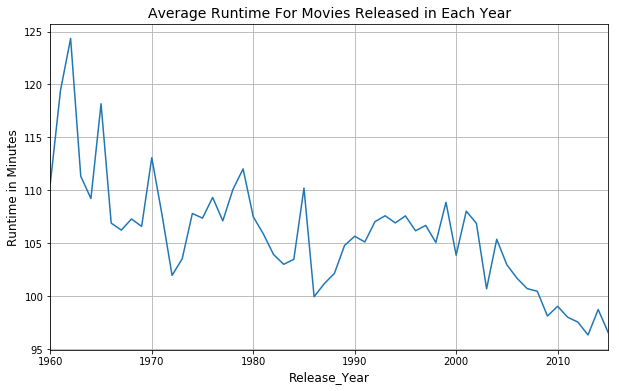

In [24]:
# Line Chart

df.groupby('release_year')['runtime'].mean().plot(figsize=(10,6), grid=True)
plt.title('Average Runtime For Movies Released in Each Year', fontsize=14)
plt.xlabel('Release_Year', fontsize=12)
plt.ylabel('Runtime in Minutes', fontsize=12)
plt.show();

From line chart it appears that average runtime for the movies released over the years has been reducing

#### Histogram to visualize the findings in question 5

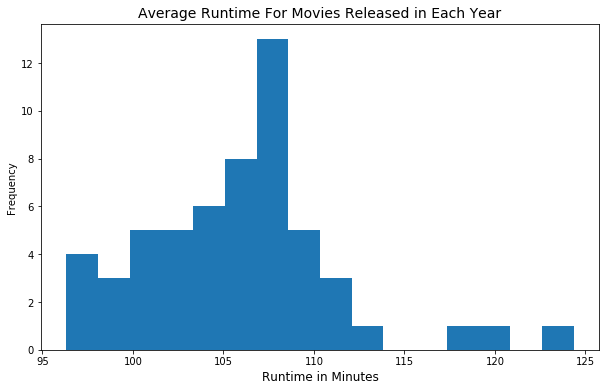

In [25]:
# Histogram

df.groupby('release_year')['runtime'].mean().plot(kind='hist',bins=16,figsize=(10,6))
plt.title('Average Runtime For Movies Released in Each Year', fontsize=14)
plt.xlabel('Runtime in Minutes', fontsize=12)
plt.show();

From histogram it looks like most of the films released over the years have runtimes less than 110 minutes

<a id='conclusions'></a>
## Conclusions

TMDB movie data contains vast amount of information that defines a movie. However I thought that it is also essential to extract the knowledge about the factors influencing a movie success. so I started analysing the important features in the data to understand the different features related to a movie and get a final summary from it. Hence I started my analysis with analysing features like release year, genres and popularity and I found out that popularity for the genres was increasing among the years but the popularity stayed below 10 for most of the time. Moreover, I also looked up for the features that is helping the movies to gain a better revenue. Next I moved onto perform my analysis on features like revenue, director, movie title and release year and it looks like revenue obtained by the movies increased and highest revenue obatained over the years stayed mostly below 1 billion dollars. Furthermore, I expanded my analysis on to finding the maximum profits earned by the movies and it appeared that profits also got increased over the years and stayed below 1 billion dollars for most part of the years. Finally, I concluded with performing my analysis on how the movie runtimes of movies changed over the years and it clearly looks like run time for the movies gradually reduced over the years and it also seemed to be like more movies had a runtime of less than 110 minutes.